In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df= df.rename(columns={'Genre':'Gender'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
 df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

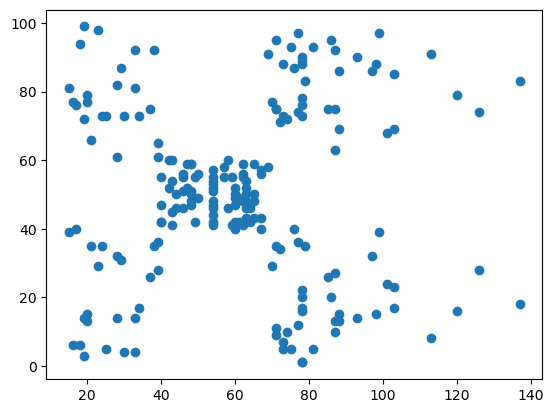

In [11]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [12]:
from sklearn.cluster import KMeans

In [13]:
#Splitting data into x and y
X=df.iloc[:,[2,3]]
y=df.iloc[:,4]

In [14]:
X

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [15]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

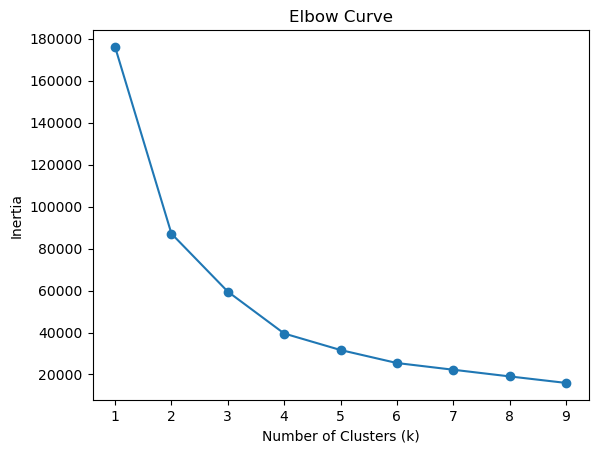

In [16]:
k_values = range(1, 10)
inertias = []

# Perform KMeans clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [18]:
#Splitting data into x and y
X=df.iloc[:,[3,4]]
y=df.iloc[:,4]

In [19]:
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
y.head(5)

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [21]:
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=20)

In [24]:
X_train.head()

,Annual Income (k$),Spending Score (1-100)
152,78,20
67,48,48
133,72,71
59,46,46
63,47,59


In [25]:
scaler=MinMaxScaler().fit(X_train)
scaler

MinMaxScaler()

In [26]:
scaler.data_min_

array([15.,  1.])

In [27]:
scaler.data_max_

array([137.,  99.])

In [28]:
scaler.feature_range

(0, 1)

In [29]:
# transform
scaler.transform(X_train)

array([[0.51639344, 0.19387755],
       [0.2704918 , 0.47959184],
       [0.46721311, 0.71428571],
       [0.25409836, 0.45918367],
       [0.26229508, 0.59183673],
       [0.68852459, 0.3877551 ],
       [0.59836066, 0.12244898],
       [0.44262295, 0.58163265],
       [0.39344262, 0.54081633],
       [0.45901639, 0.08163265],
       [0.04098361, 0.14285714],
       [0.45901639, 0.75510204],
       [0.22131148, 0.60204082],
       [0.51639344, 0.76530612],
       [0.35245902, 0.60204082],
       [0.        , 0.81632653],
       [0.2295082 , 0.40816327],
       [0.31967213, 0.51020408],
       [0.51639344, 0.        ],
       [0.2704918 , 0.51020408],
       [0.47540984, 0.04081633],
       [0.26229508, 0.52040816],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.19672131, 0.65306122],
       [0.45901639, 0.10204082],
       [0.36885246, 0.48979592],
       [0.72131148, 0.69387755],
       [0.1147541 , 0.87755102],
       [0.36065574, 0.55102041],
       [0.

In [30]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.51639344, 0.19387755],
       [0.2704918 , 0.47959184],
       [0.46721311, 0.71428571],
       [0.25409836, 0.45918367],
       [0.26229508, 0.59183673],
       [0.68852459, 0.3877551 ],
       [0.59836066, 0.12244898],
       [0.44262295, 0.58163265],
       [0.39344262, 0.54081633],
       [0.45901639, 0.08163265],
       [0.04098361, 0.14285714],
       [0.45901639, 0.75510204],
       [0.22131148, 0.60204082],
       [0.51639344, 0.76530612],
       [0.35245902, 0.60204082],
       [0.        , 0.81632653],
       [0.2295082 , 0.40816327],
       [0.31967213, 0.51020408],
       [0.51639344, 0.        ],
       [0.2704918 , 0.51020408],
       [0.47540984, 0.04081633],
       [0.26229508, 0.52040816],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.19672131, 0.65306122],
       [0.45901639, 0.10204082],
       [0.36885246, 0.48979592],
       [0.72131148, 0.69387755],
       [0.1147541 , 0.87755102],
       [0.36065574, 0.55102041],
       [0.

In [31]:
scaler = MinMaxScaler().fit(X_test)
scaler

MinMaxScaler()

In [32]:
scaler.data_min_

array([17.,  7.])

In [33]:
scaler.data_max_

array([137.,  97.])

In [34]:
scaler.transform(X_test)

array([[0.50833333, 0.11111111],
       [0.1       , 0.26666667],
       [0.025     , 0.77777778],
       [0.63333333, 0.07777778],
       [0.38333333, 0.45555556],
       [0.58333333, 0.22222222],
       [0.59166667, 0.68888889],
       [0.90833333, 0.23333333],
       [0.19166667, 0.44444444],
       [0.85833333, 0.8       ],
       [0.46666667, 0.        ],
       [0.30833333, 0.45555556],
       [0.7       , 0.67777778],
       [0.575     , 0.14444444],
       [0.30833333, 0.55555556],
       [0.59166667, 0.87777778],
       [0.50833333, 0.91111111],
       [0.575     , 0.97777778],
       [0.41666667, 0.36666667],
       [0.8       , 0.01111111],
       [0.59166667, 0.08888889],
       [0.39166667, 0.43333333],
       [0.34166667, 0.43333333],
       [0.5       , 0.74444444],
       [0.68333333, 1.        ],
       [0.49166667, 0.88888889],
       [1.        , 0.84444444],
       [0.45      , 0.31111111],
       [0.        , 0.76666667],
       [0.35833333, 0.47777778],
       [0.

In [35]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[0.50833333, 0.11111111],
       [0.1       , 0.26666667],
       [0.025     , 0.77777778],
       [0.63333333, 0.07777778],
       [0.38333333, 0.45555556],
       [0.58333333, 0.22222222],
       [0.59166667, 0.68888889],
       [0.90833333, 0.23333333],
       [0.19166667, 0.44444444],
       [0.85833333, 0.8       ],
       [0.46666667, 0.        ],
       [0.30833333, 0.45555556],
       [0.7       , 0.67777778],
       [0.575     , 0.14444444],
       [0.30833333, 0.55555556],
       [0.59166667, 0.87777778],
       [0.50833333, 0.91111111],
       [0.575     , 0.97777778],
       [0.41666667, 0.36666667],
       [0.8       , 0.01111111],
       [0.59166667, 0.08888889],
       [0.39166667, 0.43333333],
       [0.34166667, 0.43333333],
       [0.5       , 0.74444444],
       [0.68333333, 1.        ],
       [0.49166667, 0.88888889],
       [1.        , 0.84444444],
       [0.45      , 0.31111111],
       [0.        , 0.76666667],
       [0.35833333, 0.47777778],
       [0.

In [37]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [39]:
df["Target"]=y_means

In [40]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0
